In [1]:
import numpy as np
import ot
import ot.plot

import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns

import functions.xor_rxor_with_otp_functions as fn
from proglearn.sims import generate_gaussian_parity
from math import log2, ceil
from proglearn.progressive_learner import ProgressiveLearner
from proglearn.deciders import SimpleArgmaxAverage
from proglearn.transformers import (
    TreeClassificationTransformer,
    NeuralClassificationTransformer,
)
from proglearn.voters import TreeClassificationVoter, KNNClassificationVoter
from proglearn.sims import generate_gaussian_parity

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])

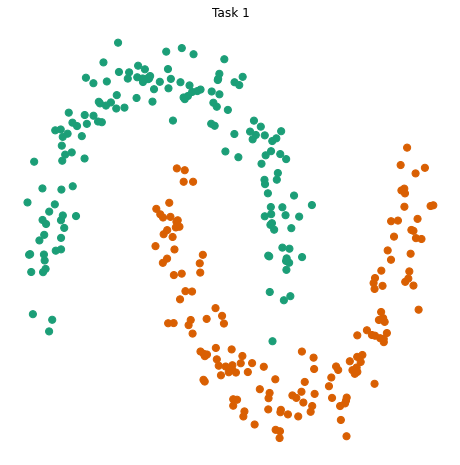

In [2]:
from sklearn.datasets import make_moons
moons = make_moons(n_samples=300, noise=0.1)

X1 = moons[0]
y = moons[1]

def get_colors(colors, inds):
    c = [colors[i] for i in inds]
    return c

colors = sns.color_palette("Dark2", n_colors=2)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X1[:,0], X1[:,1], c=get_colors(colors, y), s=50)
ax.axis("off")
plt.title('Task 1');
plt.show()

In [3]:
def generate_2d_rotation(theta=0):
    R = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])

    return R

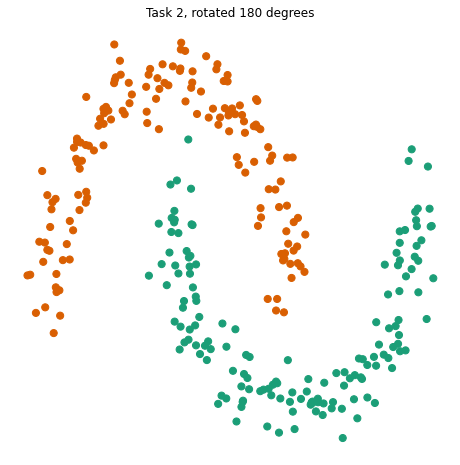

In [4]:
R = generate_2d_rotation(theta=180 * np.pi / 180)
X2 = X1 @ R

colors = sns.color_palette("Dark2", n_colors=2)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X2[:,0], X2[:,1], c=get_colors(colors, y), s=50)
ax.axis("off")
plt.title('Task 2, rotated 180 degrees');
plt.show()

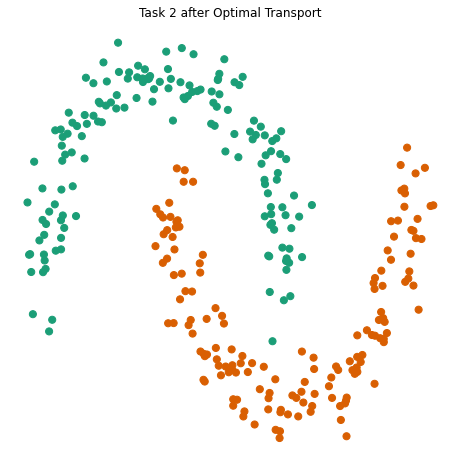

In [5]:
h = 0.05 
X1 = X1.copy()
Y1 = y.copy() 

X2 = X2.copy()
Y2 = y.copy()

ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=X2.copy(), Xt=X1.copy(), ys=y.copy(), yt=y.copy())
transp_Xs_emd = ot_emd.transform(Xs=X2.copy())
X3 = transp_Xs_emd
Y3 = y.copy()

colors = sns.color_palette("Dark2", n_colors=2)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X3[:,0], X3[:,1], c=get_colors(colors, y), s=50)
ax.axis("off")
plt.title('Task 2 after Optimal Transport');
plt.show()

xx1, yy1 = np.meshgrid(np.arange(-3, 3, h), np.arange(-3, 3, h))
grid1 = np.c_[xx1.ravel(), yy1.ravel()]

In [6]:
n_trees=10
max_depth=None

default_transformer_class = TreeClassificationTransformer
default_transformer_kwargs = {"kwargs": {"max_depth": max_depth}}

default_voter_class = TreeClassificationVoter
default_voter_kwargs = {}

default_decider_class = SimpleArgmaxAverage
default_decider_kwargs = {"classes": np.arange(2)}
progressive_learner = ProgressiveLearner(
    default_transformer_class=default_transformer_class,
    default_transformer_kwargs=default_transformer_kwargs,
    default_voter_class=default_voter_class,
    default_voter_kwargs=default_voter_kwargs,
    default_decider_class=default_decider_class,
    default_decider_kwargs=default_decider_kwargs,
)

#ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-2)
#ot_sinkhorn.fit(Xs=X_task2.copy(), Xt=X_task1.copy(), ys=y_task2.copy(), yt=y_task1.copy())
#transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=X_task2.copy())
#X_task2 = transp_Xs_sinkhorn
        
#ot_lasso = ot.da.SinkhornL1l2Transport(reg_e=0.1, max_iter=30)
#ot_lasso.fit(Xs=X_task2.copy(), Xt=X_task1.copy(), ys=y_task2.copy(), yt=y_task1.copy())
#transp_Xs_lasso = ot_lasso.transform(Xs=X_task2.copy())
#X_task2 = transp_Xs_lasso

progressive_learner.add_task(X1, Y1, num_transformers=n_trees)

progressive_learner.add_task(X2, Y2, num_transformers=n_trees)

l2f_grid1 = progressive_learner.task_id_to_decider[0].predict_proba(grid1, transformer_ids=[0])[:,0]
l2f_grid1 = l2f_grid1.reshape(xx1.shape)

l2f_grid2 = progressive_learner.task_id_to_decider[1].predict_proba(grid1, transformer_ids=[1])[:,0]
l2f_grid2 = l2f_grid2.reshape(xx1.shape)

l2f_grid3 = progressive_learner.task_id_to_decider[0].predict_proba(grid1)[:,0]
l2f_grid3 = l2f_grid3.reshape(xx1.shape)

l2f_grid4 = progressive_learner.task_id_to_decider[1].predict_proba(grid1)[:,0]
l2f_grid4 = l2f_grid4.reshape(xx1.shape)

#uf_task1 = uf.predict_proba(grid1, transformer_ids=[0], task_id=0)
#l2f_task1 = progressive_learner.predict_proba(grid1, task_id=0)

<ipython-input-7-fbd9bb7577be>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1, yy1, l2f_grid1);
<ipython-input-7-fbd9bb7577be>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx1, yy1, l2f_grid2);
<ipython-input-7-fbd9bb7577be>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading=

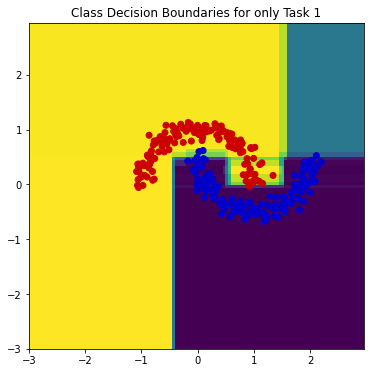

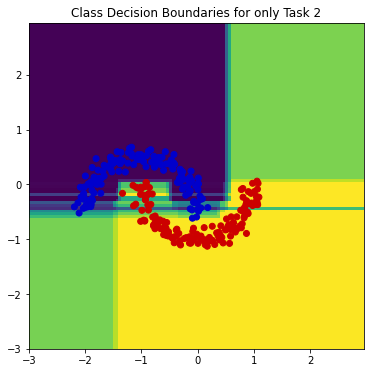

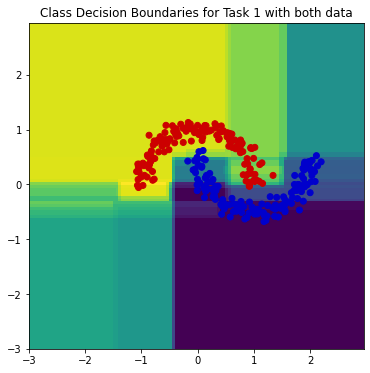

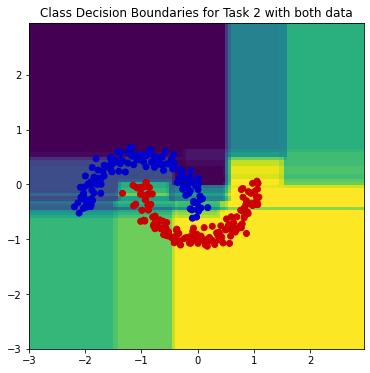

In [7]:
plt.figure(figsize=(6,6));
plt.pcolormesh(xx1, yy1, l2f_grid1);
plt.scatter(X1[:,0], X1[:,1], c=Y1, cmap=cmap_bold);
plt.xlim(xx1.min(), xx1.max());
plt.ylim(yy1.min(), yy1.max());
plt.title('Class Decision Boundaries for only Task 1');

plt.figure(figsize=(6,6));
plt.pcolormesh(xx1, yy1, l2f_grid2);
plt.scatter(X2[:,0], X2[:,1], c=Y1, cmap=cmap_bold);
plt.xlim(xx1.min(), xx1.max());
plt.ylim(yy1.min(), yy1.max());
plt.title('Class Decision Boundaries for only Task 2');

plt.figure(figsize=(6,6));
plt.pcolormesh(xx1, yy1, l2f_grid3);
plt.scatter(X1[:,0], X1[:,1], c=Y1, cmap=cmap_bold);
plt.xlim(xx1.min(), xx1.max());
plt.ylim(yy1.min(), yy1.max());
plt.title('Class Decision Boundaries for Task 1 with both data');

plt.figure(figsize=(6,6));
plt.pcolormesh(xx1, yy1, l2f_grid4);
plt.scatter(X2[:,0], X2[:,1], c=Y1, cmap=cmap_bold);
plt.xlim(xx1.min(), xx1.max());
plt.ylim(yy1.min(), yy1.max());
plt.title('Class Decision Boundaries for Task 2 with both data');

In [65]:
angle_sweep = range(0,91,10)
task1_sample = 200
task2_sample = 200
mc_rep = 50

In [3]:
mean_te1 = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep, register=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Don

In [4]:
mean_te2 = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep, register=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Don

In [6]:
import functions.xor_rxor_with_icp_functions as fn1

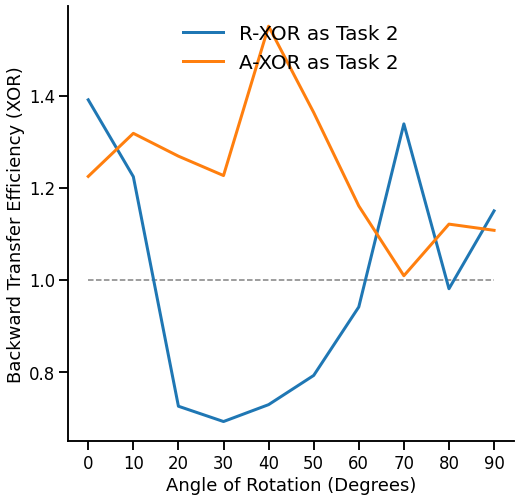

In [7]:
fn1.plot_bte_v_angle(angle_sweep, mean_te1, mean_te2)

In [7]:
mean_te_icp = fn1.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep, register=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: 

[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 4952 ta

[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 1202 tasks

[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Us

[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 2402 tas

[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_

[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 4002 ta

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 752 tasks 

[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 4952 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5000 ou

In [8]:
mean_te_cpd = fn2.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep, adaptation=True)

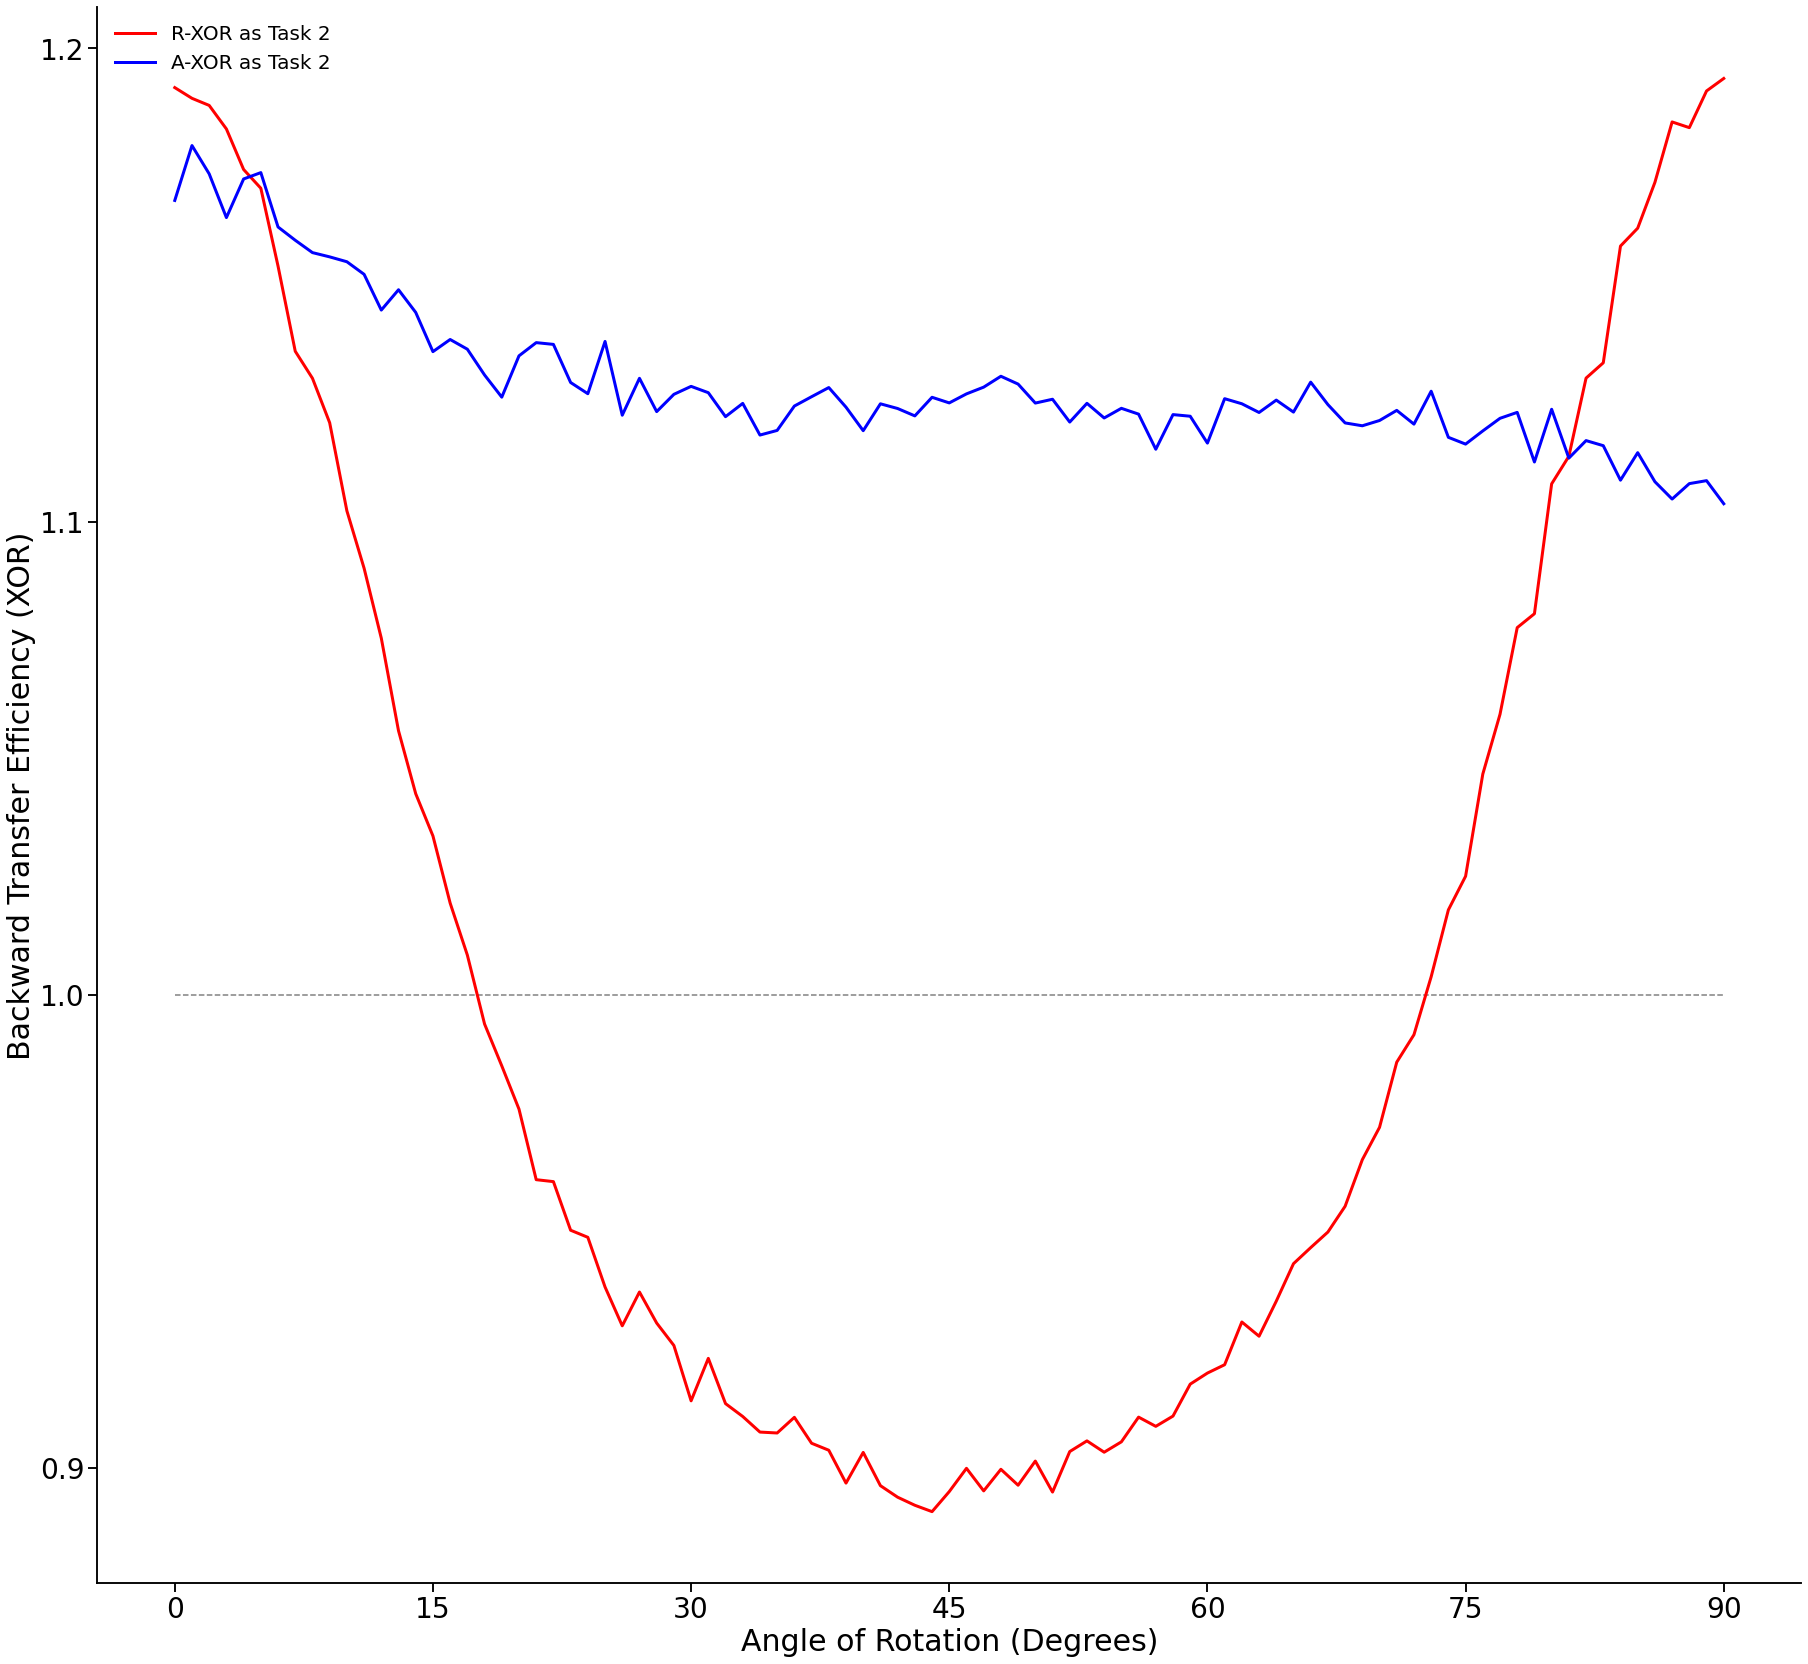

In [11]:
fn.plot_bte_v_angle(angle_sweep, mean_te1, mean_te_icp)

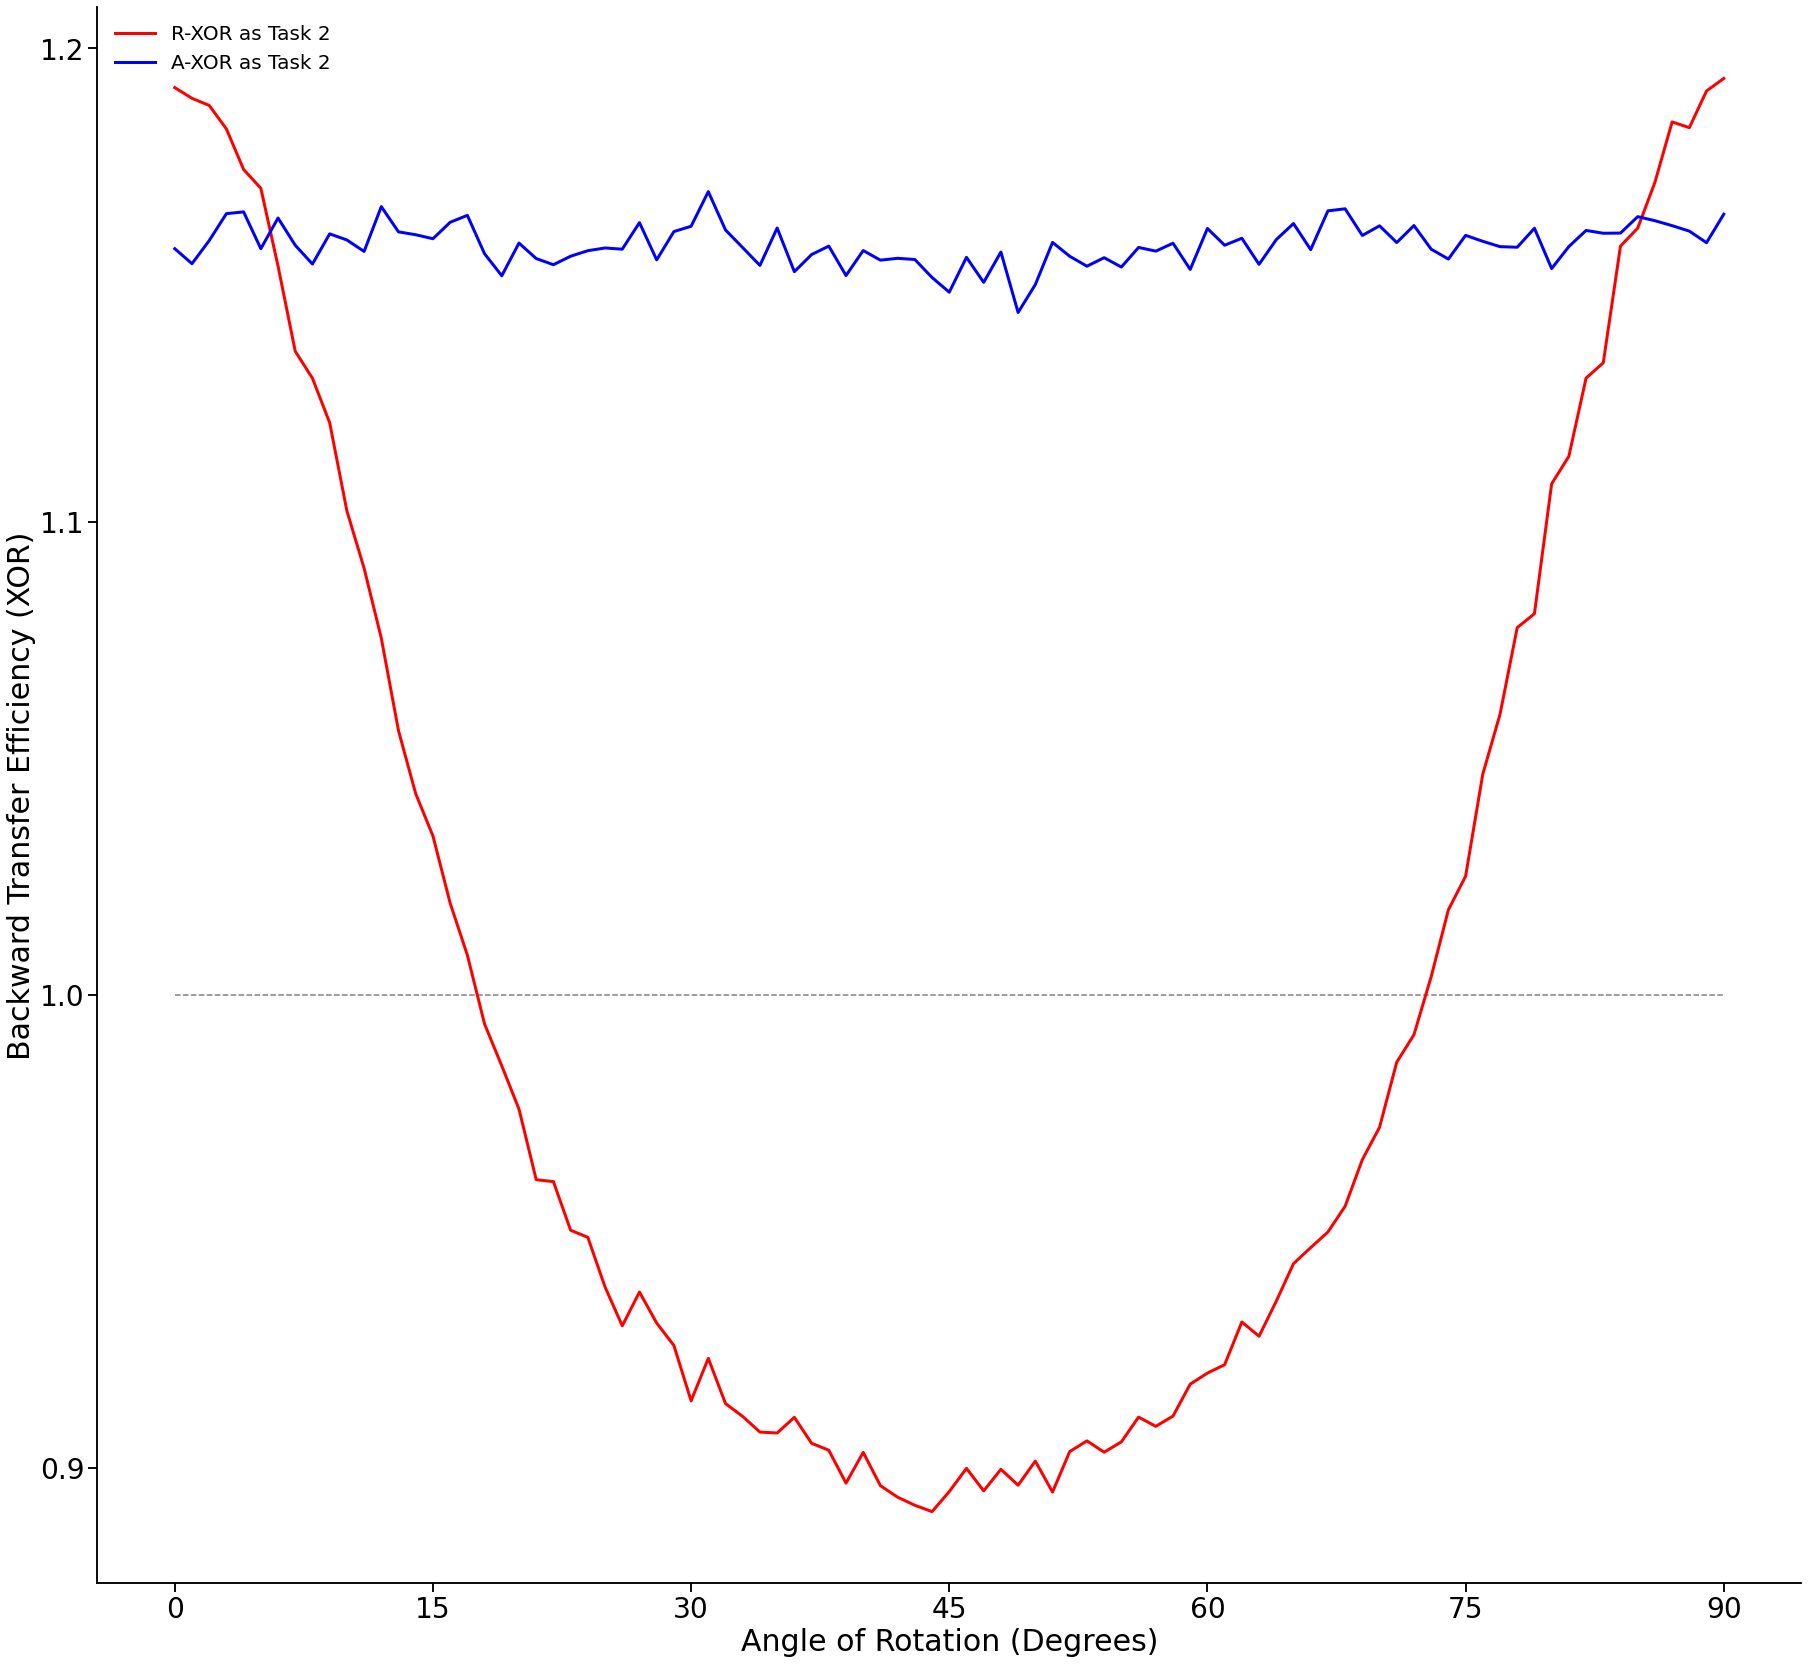

In [12]:
fn.plot_bte_v_angle(angle_sweep, mean_te1, mean_te_cpd)

In [10]:
import pickle

with open('./xor_rxor.pickle','wb') as f:
    pickle.dump(mean_te1,f)

with open('./icp.pickle','wb') as f:
    pickle.dump(mean_te_icp,f)
    
with open('./cpd.pickle','wb') as f:
    pickle.dump(mean_te_cpd,f)
    
with open('./emd.pickle','wb') as f:
    pickle.dump(mean_te2,f)

In [4]:
import pickle

with open('./lasso.pickle','wb') as f:
    pickle.dump(mean_te2,f)